In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Retail_Transactions_Dataset.csv')

# Inspect the data
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,NaN
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,NaN
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          20009 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [54]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop rows with missing values
df = df.fillna(0)  # Replace with appropriate imputation technique

In [55]:
# Preprocessing: Convert the 'Date' column to datetime and aggregate sales by day (Total_Cost)

# Step 1: Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Aggregate 'Total_Cost' by day to create time series data
df_daily_sales = df.groupby(df['Date'].dt.date)['Total_Cost'].sum().reset_index()

# Renaming columns for better readability
df_daily_sales.columns = ['Date', 'Total_Sales']

# Display the first few rows of the preprocessed data
df_daily_sales.head()

,Date,Total_Sales
0,2020-01-01,1636.29
1,2020-01-02,1288.59
2,2020-01-03,1066.00
3,2020-01-04,883.55
4,2020-01-05,1126.97


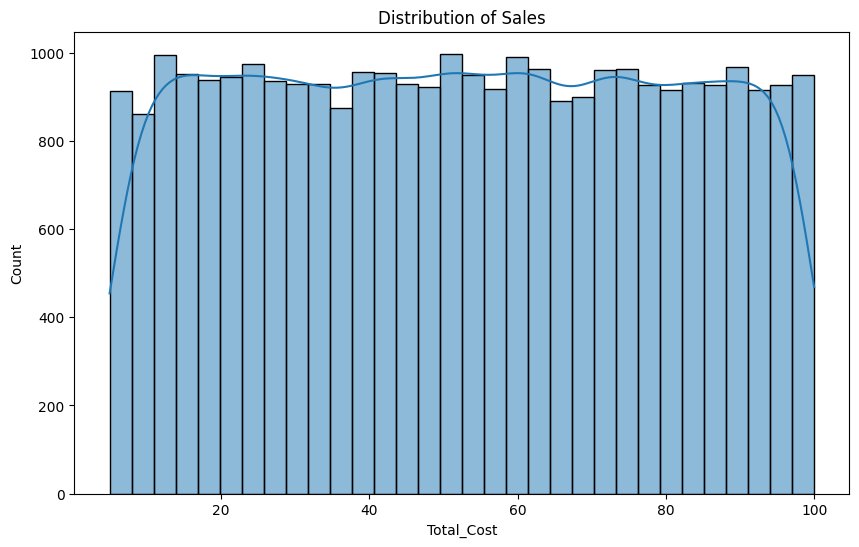

In [56]:
# Visualize the distribution of sales data
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Cost'], kde=True)
plt.title('Distribution of Sales')
plt.show()

In [57]:
# Exploratory Data Analysis (EDA)
print("Statistical Summary of Numerical Features:")
df.describe()

Statistical Summary of Numerical Features:


,Transaction_ID,Date,Total_Items,Total_Cost
count,3.000000e+04,30000,30000.000000,30000.000000
mean,1.000015e+09,2021-11-28 09:06:56.383100160,5.497800,52.504527
min,1.000000e+09,2020-01-01 00:18:32,1.000000,5.000000
25%,1.000007e+09,2020-12-14 23:28:09.249999872,3.000000,28.687500
50%,1.000015e+09,2021-11-25 00:52:45,5.000000,52.480000
75%,1.000022e+09,2022-11-11 22:43:04.750000128,8.000000,76.100000
max,1.000030e+09,2023-11-01 10:04:35,10.000000,99.990000
std,8.660398e+03,NaN,2.873686,27.363732


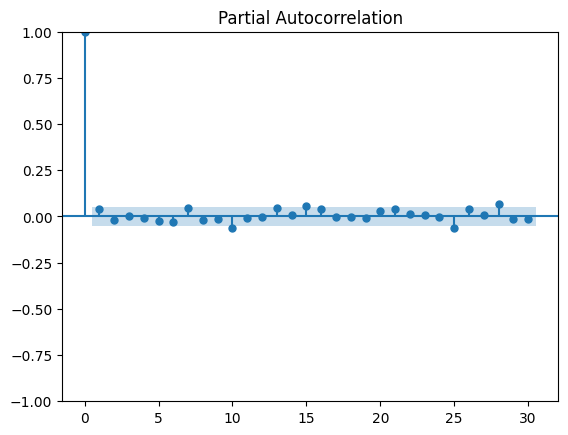

In [58]:
plot_pacf(df_daily_sales['Total_Sales'], lags=30)
plt.title('Partial Autocorrelation')
plt.show()

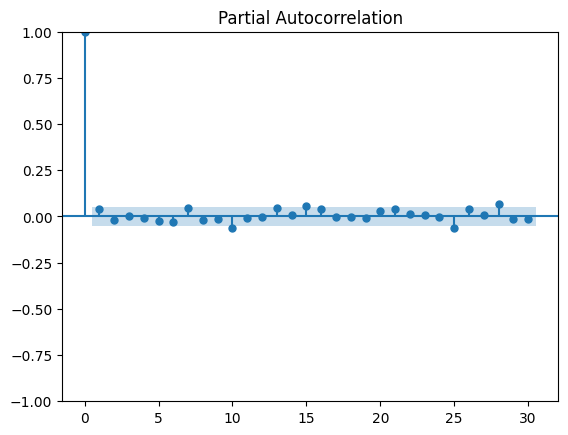

In [59]:
plot_pacf(df_daily_sales['Total_Sales'], lags=30)
plt.title('Partial Autocorrelation')
plt.show()

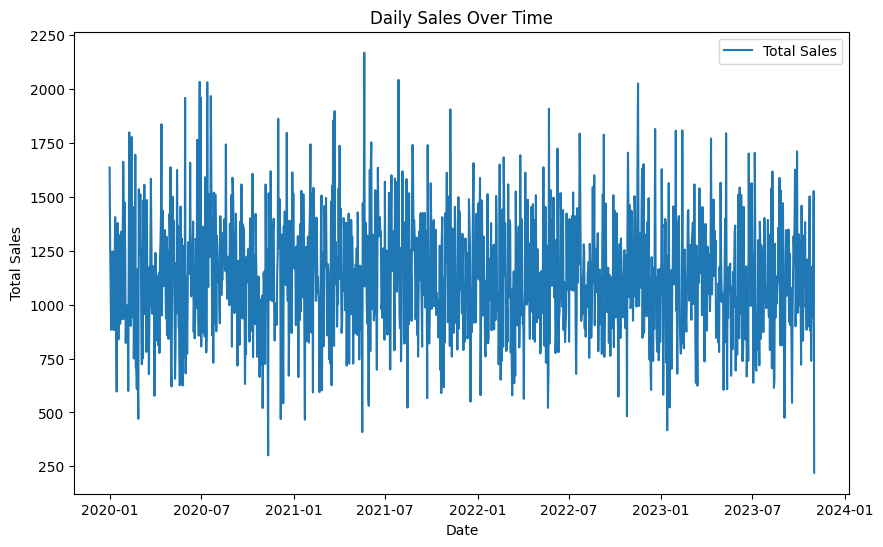

In [60]:
import matplotlib.pyplot as plt

# Plotting the daily sales trend
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales['Date'], df_daily_sales['Total_Sales'], label='Total Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

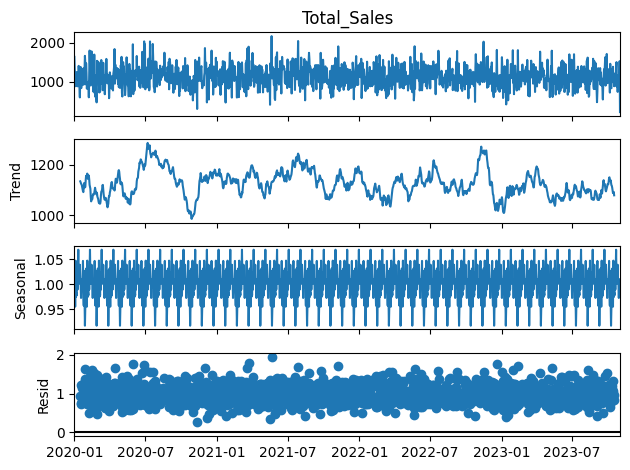

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index
df_daily_sales.set_index('Date', inplace=True)

# Perform decomposition
decomposition = seasonal_decompose(df_daily_sales['Total_Sales'], model='multiplicative', period=30)
decomposition.plot()
plt.show()

# Reset the index for future steps
df_daily_sales.reset_index(inplace=True)

In [62]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df_daily_sales.rename(columns={'Date': 'ds', 'Total_Sales': 'y'})

In [63]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1mc69ghv/1l5050ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1mc69ghv/bhkj4kwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8579', 'data', 'file=/tmp/tmp1mc69ghv/1l5050ll.json', 'init=/tmp/tmp1mc69ghv/bhkj4kwf.json', 'output', 'file=/tmp/tmp1mc69ghv/prophet_model9gxwxf1l/prophet_model-20241002073852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
# Create future dates
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

In [65]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,1142.942132,841.871750,1534.410473,1142.942132,1142.942132,39.394934,39.394934,39.394934,19.772639,19.772639,19.772639,19.622295,19.622295,19.622295,0.0,0.0,0.0,1182.337066
1,2020-01-02,1142.923154,804.224689,1545.871572,1142.923154,1142.923154,49.130217,49.130217,49.130217,33.715222,33.715222,33.715222,15.414996,15.414996,15.414996,0.0,0.0,0.0,1192.053372
2,2020-01-03,1142.904177,793.848981,1488.546025,1142.904177,1142.904177,11.625777,11.625777,11.625777,0.950480,0.950480,0.950480,10.675298,10.675298,10.675298,0.0,0.0,0.0,1154.529954
3,2020-01-04,1142.885199,766.925220,1491.662139,1142.885199,1142.885199,-10.587660,-10.587660,-10.587660,-16.120271,-16.120271,-16.120271,5.532610,5.532610,5.532610,0.0,0.0,0.0,1132.297539
4,2020-01-05,1142.866221,763.805432,1451.032689,1142.866221,1142.866221,-27.485824,-27.485824,-27.485824,-27.609735,-27.609735,-27.609735,0.123911,0.123911,0.123911,0.0,0.0,0.0,1115.380397


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


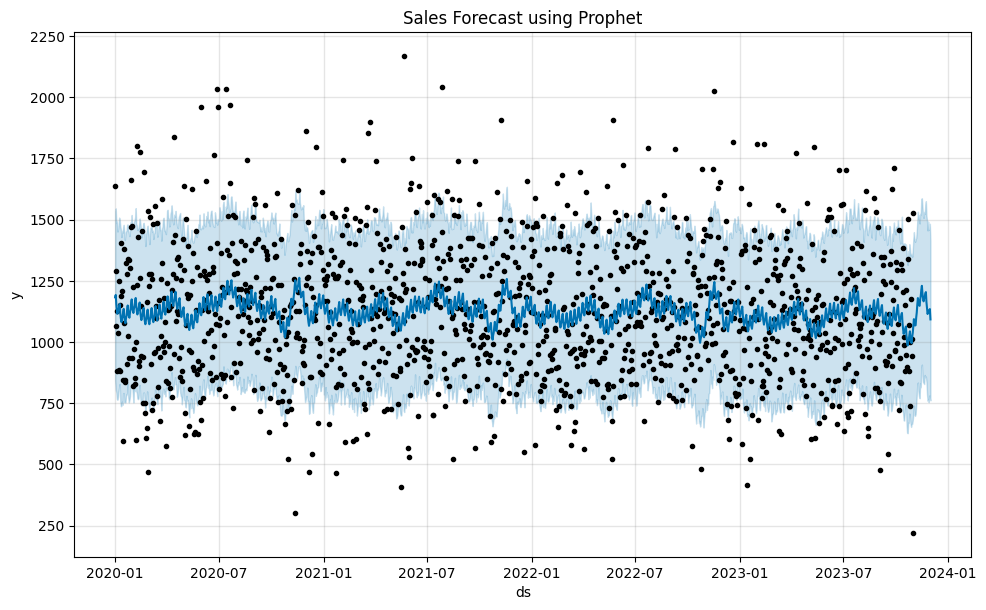

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

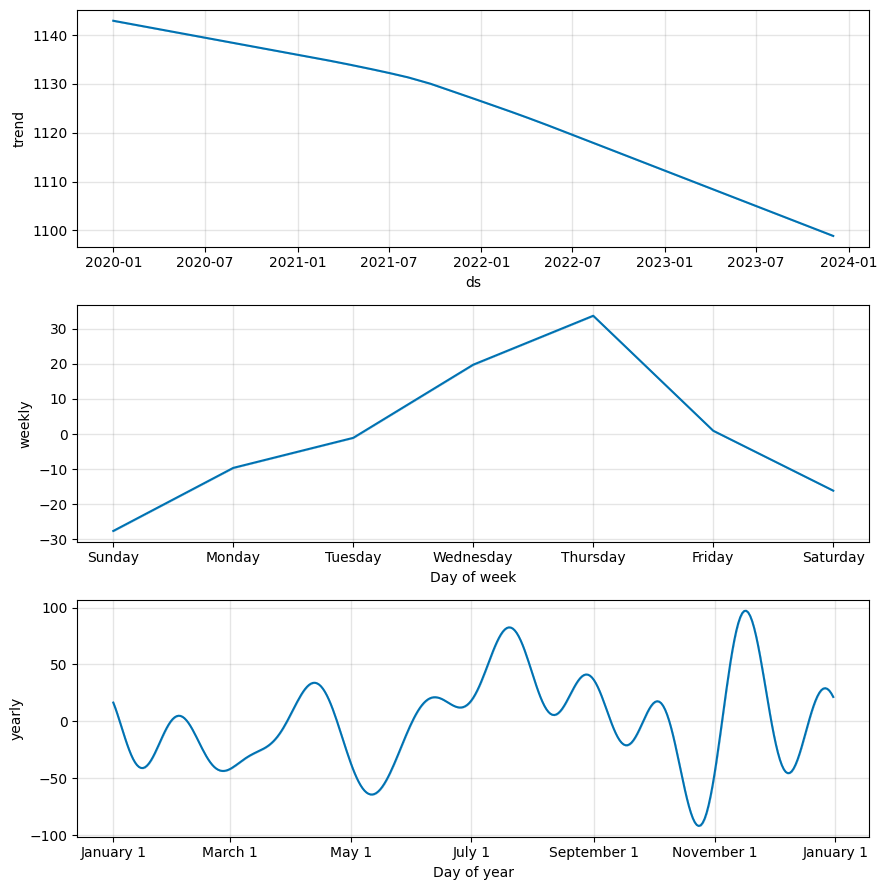

In [66]:
# Plot the forecast
model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.show()

# Plot forecast components
model.plot_components(forecast)
plt.show()

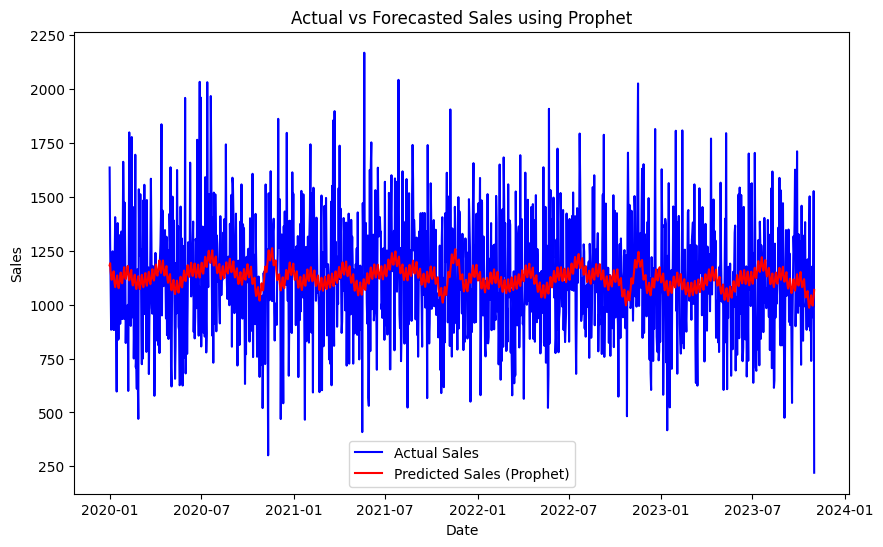

In [67]:
# Merging the original and forecasted data for comparison
df_merged = df_prophet.set_index('ds').join(forecast[['ds', 'yhat']].set_index('ds'))

# Plot the actual and predicted sales
plt.figure(figsize=(10,6))
plt.plot(df_merged.index, df_merged['y'], label='Actual Sales', color='blue')
plt.plot(df_merged.index, df_merged['yhat'], label='Predicted Sales (Prophet)', color='red')

plt.title('Actual vs Forecasted Sales using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [68]:
# Create lag features
df_lag = df_daily_sales.copy()
df_lag['lag_1'] = df_lag['Total_Sales'].shift(1)  # 1-day lag
df_lag['lag_7'] = df_lag['Total_Sales'].shift(7)  # 7-day lag (weekly seasonality)

# Rolling window features
df_lag['rolling_mean_7'] = df_lag['Total_Sales'].rolling(window=7).mean()
df_lag['rolling_std_7'] = df_lag['Total_Sales'].rolling(window=7).std()

# Drop NA values from lag features
df_lag = df_lag.dropna()

In [69]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_lag.drop(columns=['Total_Sales', 'Date'])
y = df_lag['Total_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [70]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 73943.67291293772


In [71]:
predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predict.head()

,Actual,Predicted
1122,1094.33,966.857605
1123,1325.34,1476.149780
1124,1128.65,1286.976074
1125,1806.91,1394.135864
1126,971.42,1405.304443


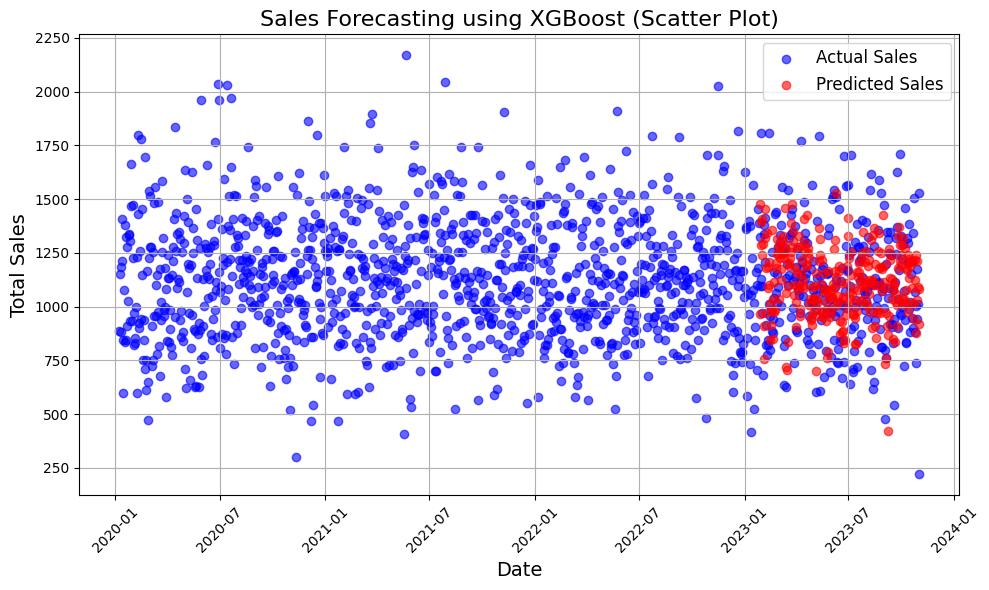

In [72]:


# Scatter plot for a different visualization
plt.figure(figsize=(10, 6))

# Scatter for actual sales
plt.scatter(df_lag['Date'], df_lag['Total_Sales'], label='Actual Sales', color='blue', alpha=0.6)

# Scatter for predicted sales
plt.scatter(df_lag['Date'].iloc[len(X_train):], y_pred, label='Predicted Sales', color='red', alpha=0.6)

plt.title('Sales Forecasting using XGBoost (Scatter Plot)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1mc69ghv/5fdxsfjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1mc69ghv/c0n0_3i5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77689', 'data', 'file=/tmp/tmp1mc69ghv/5fdxsfjm.json', 'init=/tmp/tmp1mc69ghv/c0n0_3i5.json', 'output', 'file=/tmp/tmp1mc69ghv/prophet_modelyqto41sp/prophet_model-20241002073857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Improved Ensemble Mean Squared Error: 64758.86830742664


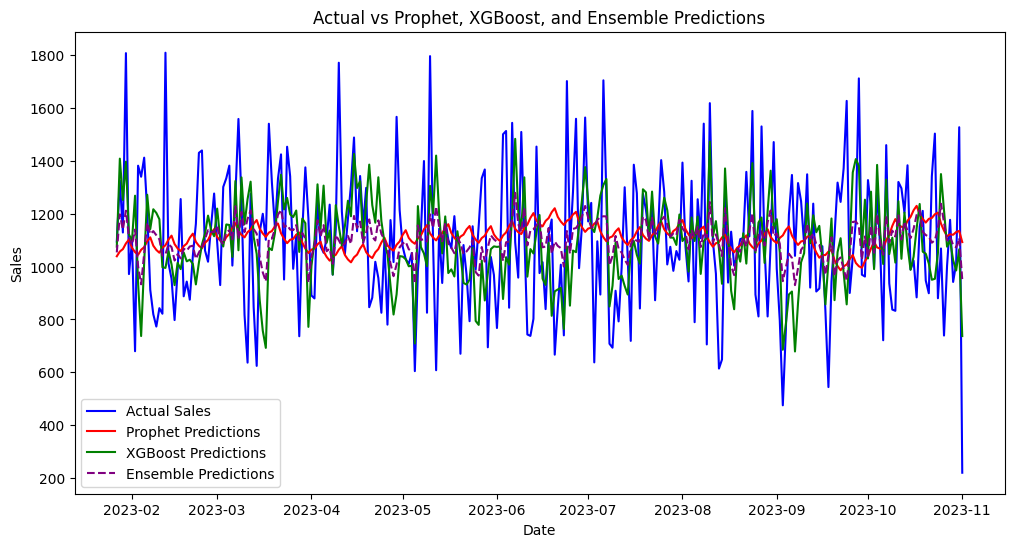

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from prophet import Prophet

# Step 1: Prepare the data
# Convert the 'Date' column to datetime and set it as index
df_daily_sales['Date'] = pd.to_datetime(df_daily_sales['Date'])
df_daily_sales.set_index('Date', inplace=True)

# Step 2: Fit the Prophet model and get predictions
df_prophet = df_daily_sales.reset_index().rename(columns={'Date': 'ds', 'Total_Sales': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dates and make predictions
future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

# Step 3: Improved Feature Engineering for XGBoost
df_lag = df_daily_sales.copy()

# Create lag features
df_lag['lag_1'] = df_lag['Total_Sales'].shift(1)
df_lag['lag_7'] = df_lag['Total_Sales'].shift(7)

# Add time-based features (e.g., month, day of the week)
df_lag['month'] = df_lag.index.month
df_lag['day_of_week'] = df_lag.index.dayofweek

# Rolling statistics
df_lag['rolling_mean_7'] = df_lag['Total_Sales'].rolling(window=7).mean()
df_lag['rolling_std_7'] = df_lag['Total_Sales'].rolling(window=7).std()

# Drop NA values from lag features
df_lag = df_lag.dropna()

# Define features and target
X = df_lag.drop(columns=['Total_Sales'])
y = df_lag['Total_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)

# Make predictions using XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Step 5: Ensemble the predictions from Prophet and XGBoost
# Prophet predictions for the same period as the XGBoost test set
prophet_test_predictions = prophet_forecast.set_index('ds')['yhat'].iloc[-len(y_test):]

# Weighted ensemble (adjust the weights for each model)
weight_prophet = 0.6
weight_xgb = 0.4

ensemble_predictions = (weight_prophet * prophet_test_predictions.values + weight_xgb * xgb_predictions)

# Step 6: Evaluate the ensemble predictions
mse_ensemble = mean_squared_error(y_test, ensemble_predictions)
print(f'Improved Ensemble Mean Squared Error: {mse_ensemble}')

# Step 7: Plot actual vs Prophet, XGBoost, and Ensemble predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(y_test.index, prophet_test_predictions, label='Prophet Predictions', color='red')
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='green')
plt.plot(y_test.index, ensemble_predictions, label='Ensemble Predictions', color='purple', linestyle='--')

plt.title('Actual vs Prophet, XGBoost, and Ensemble Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
